# Customer Dataset : Working with Missing Values

## Hemant Thapa

1. Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import minmax_scaling

2. Loading Dataset

In [6]:
df = pd.read_csv(r'balance.txt', delim_whitespace=True)

In [7]:
# loading top five rows
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


In [8]:
# loading bottom five rows
df.tail()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
395,8.76498389979819,12.096,4100,307.0,3.0,32.0,13.0,Male,No,Yes,Caucasian
396,9.94383770023455,13.364,3838,296.0,5.0,65.0,17.0,NaN,No,No,African American
397,14.882078455256,57.872,4171,321.0,5.0,67.0,12.0,Female,No,Yes,Caucasian
398,12.0010707267157,37.728,2525,192.0,1.0,44.0,13.0,NaN,No,Yes,Caucasian
399,10.1595983903564,18.701,5524,415.0,5.0,64.0,7.0,Female,No,No,NaN


3. Pre Processing

In [9]:
# total rows and columns
df.shape

(400, 11)

In [10]:
# data types
df.dtypes

,0
Balance,object
Income,object
Limit,object
Rating,float64
Cards,float64
Age,float64
Education,float64
Gender,object
Student,object
Married,object


In [11]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Balance    400 non-null    object 
 1   Income     394 non-null    object 
 2   Limit      385 non-null    object 
 3   Rating     389 non-null    float64
 4   Cards      399 non-null    float64
 5   Age        390 non-null    float64
 6   Education  394 non-null    float64
 7   Gender     392 non-null    object 
 8   Student    393 non-null    object 
 9   Married    397 non-null    object 
 10  Ethnicity  389 non-null    object 
dtypes: float64(4), object(7)
memory usage: 34.5+ KB


In [12]:
# missing values
df.isnull().sum()

,0
Balance,0
Income,6
Limit,15
Rating,11
Cards,1
Age,10
Education,6
Gender,8
Student,7
Married,3


In [13]:
# total missing values inside our dataset
df.isnull().sum().sum()

78

In [14]:
f'Total Missing value inside our dataset : {df.isnull().sum().sum()}'

'Total Missing value inside our dataset : 78'

## Working with missing values

In [15]:
df.columns

Index(['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')

In [16]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

In [17]:
df.columns

Index(['balance', 'income', 'limit', 'rating', 'cards', 'age', 'education',
       'gender', 'student', 'married', 'ethnicity'],
      dtype='object')

In [18]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
balance,0
income,6
limit,15
rating,11
cards,1
age,10
education,6
gender,8
student,7
married,3


In [19]:
# percentage of data that is missing
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
f' Total Missing Values in term of percentage is: {round((total_missing / total_cells) * 100,2)} %'


' Total Missing Values in term of percentage is: 1.77 %'

## Drop Missing Values

In [22]:
# creating temp dataset
df_temp = df.dropna()

In [23]:
# droping all missing values
df_temp.isnull().sum()

,0
balance,0
income,0
limit,0
rating,0
cards,0
age,0
education,0
gender,0
student,0
married,0


In [24]:
df_temp.head()

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian


## Removing Null values from columns

In [25]:
# created another temporary dataframe
df_temp_2 = df
df_temp_2.head()

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


In [26]:
# remove all columns with at least one missing value
columns_with_na_dropped = df_temp_2.dropna(axis=1)
columns_with_na_dropped.head()

,balance
0,12.2407984760474
1,23.2833339223376
2,22.5304088790893
3,27.652810710665
4,16.8939784904888


## Filling in missing values automatically

In [27]:
# created another temporary dataframe
df_temp_3 = df
df_temp_3.head()

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


In [28]:
# replace NaN with zero or '0'
df_temp_3.fillna(0).head()

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,0.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,0,6645,483.0,3.0,82.0,15.0,Female,0,Yes,Asian
2,22.5304088790893,104.593,7075,0.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,0,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


In [29]:
# created another temporary dataframe
df_temp_4 = df
df_temp_4.head(20)

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.7569648697007,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


In [30]:
# backward fill for missing values
df_temp_4.fillna(method='bfill', axis=0).fillna(0).head(20)

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,82.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,104.593,6645,483.0,3.0,82.0,15.0,Female,No,Yes,Asian
2,22.5304088790893,104.593,7075,681.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,Male,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.7569648697007,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


In [31]:
# created another temporary dataframe
df_temp_5 = df
df_temp_5.head(20)

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.7569648697007,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


In [32]:
df_temp_5.fillna(method='ffill', axis=0).fillna(0).head(20)

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,0.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,14.891,6645,483.0,3.0,82.0,15.0,Female,No,Yes,Asian
2,22.5304088790893,104.593,7075,483.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,Male,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.7569648697007,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


## Mean, Median and Mode Imputation

In [33]:
df.columns

Index(['balance', 'income', 'limit', 'rating', 'cards', 'age', 'education',
       'gender', 'student', 'married', 'ethnicity'],
      dtype='object')

In [34]:
df.isnull().sum()

,0
balance,0
income,6
limit,15
rating,11
cards,1
age,10
education,6
gender,8
student,7
married,3


In [35]:
df.dtypes

,0
balance,object
income,object
limit,object
rating,float64
cards,float64
age,float64
education,float64
gender,object
student,object
married,object


In [36]:
# converting all float to integer
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype('Int64')

In [37]:
df.dtypes

,0
balance,object
income,object
limit,object
rating,Int64
cards,Int64
age,Int64
education,Int64
gender,object
student,object
married,object


In [38]:
# selecting flaot and int columns
mean_median_dtype = df.select_dtypes(include=['float64', 'int64'])

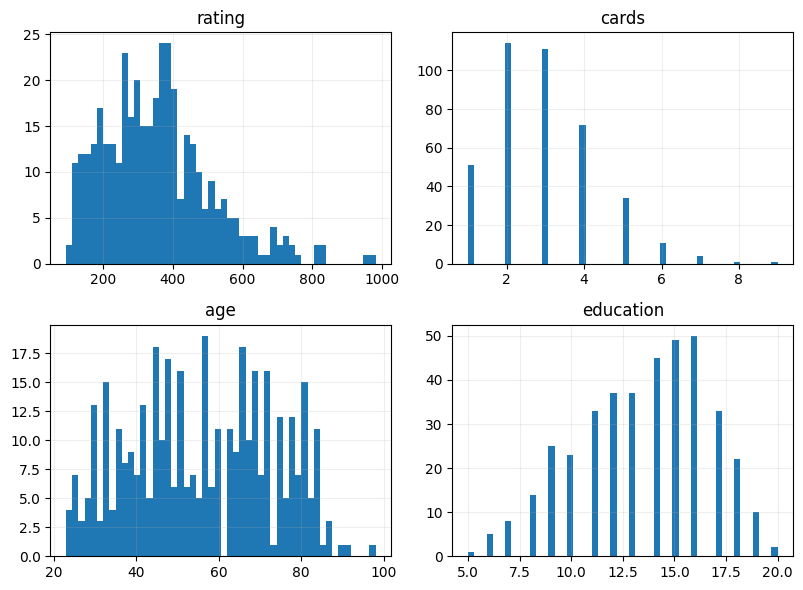

In [39]:
mean_median_dtype.hist(figsize=(8, 6), bins=50)
for ax in plt.gcf().get_axes():
    ax.grid(True, ls='-', alpha=0.2)
plt.tight_layout()
plt.show()

In [40]:
df['rating'] = df['rating'].fillna(df['rating'].median())
df['cards'] = df['cards'].fillna(df['cards'].median())

In [41]:
df['age'] = df['age'].fillna(int(df['age'].mean()))
df['education'] = df['education'].fillna(int(df['education'].mean()))

In [42]:
df.isnull().sum()

,0
balance,0
income,6
limit,15
rating,0
cards,0
age,0
education,0
gender,8
student,7
married,3


In [43]:
# object columns
object_columns = df.select_dtypes(include=['object']).columns

# mode for each object column
print("Modes of Categorical Columns:")
for column in object_columns:
    # get the mode value
    mode_value = df[column].mode()[0]
    # count occurrences of the mode value
    count = df[column].value_counts().get(mode_value, 0)
    print(f"Column: {column} | Most Occurring Value: '{mode_value}' | Count: {count}")


Modes of Categorical Columns:
Column: balance | Most Occurring Value: '10.005242019582' | Count: 1
Column: income | Most Occurring Value: '23.793' | Count: 2
Column: limit | Most Occurring Value: '2120' | Count: 2
Column: gender | Most Occurring Value: 'Female' | Count: 203
Column: student | Most Occurring Value: 'No' | Count: 354
Column: married | Most Occurring Value: 'Yes' | Count: 242
Column: ethnicity | Most Occurring Value: 'Caucasian' | Count: 193


In [44]:
for column in object_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [45]:
df.isnull().sum()

,0
balance,0
income,0
limit,0
rating,0
cards,0
age,0
education,0
gender,0
student,0
married,0


In [46]:
df

,balance,income,limit,rating,cards,age,education,gender,student,married,ethnicity
0,12.2407984760474,14.891,3606,283,2,55,11,Male,No,Yes,Caucasian
1,23.2833339223376,23.793,6645,483,3,82,15,Female,No,Yes,Asian
2,22.5304088790893,104.593,7075,344,4,71,11,Male,No,No,Asian
3,27.652810710665,148.924,9504,681,3,36,11,Female,No,No,Asian
4,16.8939784904888,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...
395,8.76498389979819,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian
396,9.94383770023455,13.364,3838,296,5,65,17,Female,No,No,African American
397,14.882078455256,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian
398,12.0010707267157,37.728,2525,192,1,44,13,Female,No,Yes,Caucasian
